In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# Any results you write to the current directory are saved as output.
from pandas import read_csv
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [4]:
# Dimension of the dataset
print(np.shape(data))

(506, 14)


In [5]:
print(data.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
data = data[~(data['MEDV'] >= 50.0)]
np.shape(data)

(490, 14)

<AxesSubplot:>

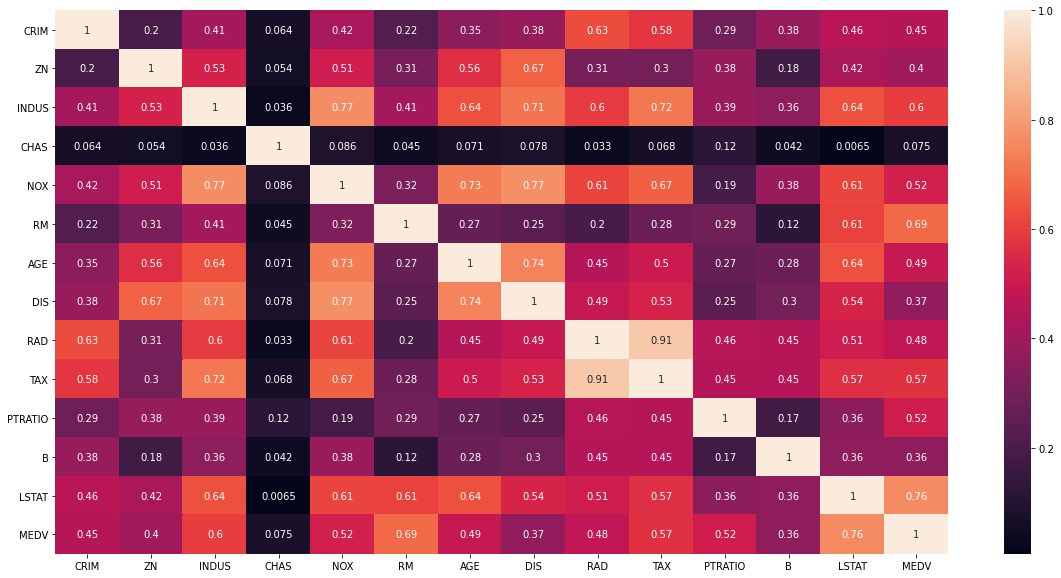

In [8]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

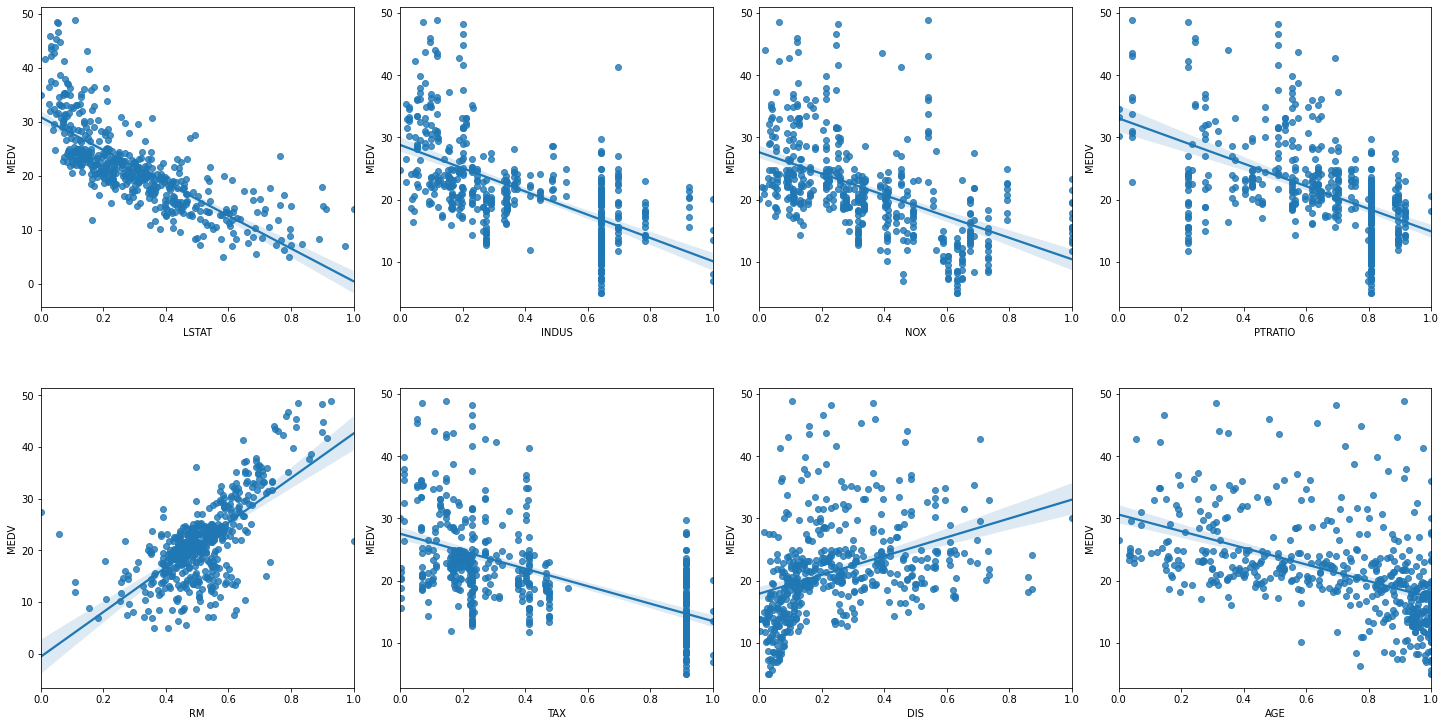

In [9]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [10]:
X_train = x.head(400)
Y_train = y.head(400)

X_test = x.tail(90)
Y_test = y.tail(90)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

In [12]:
batch_size = 32
epochs = 800
inp_shape = X_train.shape[1]

In [41]:
model = Sequential([
    Dense(20, activation='relu', input_shape=(inp_shape,)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
history = model.fit(x, y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

l_loss: 15.7926 - val_mae: 3.2732 - val_mse: 15.7926
Epoch 683/800
14/14 [==============================] - 0s 5ms/step - loss: 12.2516 - mae: 2.5554 - mse: 12.2516 - val_loss: 16.4381 - val_mae: 3.3333 - val_mse: 16.4381
Epoch 684/800
14/14 [==============================] - 0s 6ms/step - loss: 12.2297 - mae: 2.5365 - mse: 12.2297 - val_loss: 16.2965 - val_mae: 3.3192 - val_mse: 16.2965
Epoch 685/800
14/14 [==============================] - 0s 6ms/step - loss: 12.2398 - mae: 2.5288 - mse: 12.2398 - val_loss: 16.3768 - val_mae: 3.3270 - val_mse: 16.3768
Epoch 686/800
14/14 [==============================] - 0s 5ms/step - loss: 12.2277 - mae: 2.5350 - mse: 12.2277 - val_loss: 16.0364 - val_mae: 3.2942 - val_mse: 16.0364
Epoch 687/800
14/14 [==============================] - 0s 18ms/step - loss: 12.2295 - mae: 2.5550 - mse: 12.2295 - val_loss: 15.9901 - val_mae: 3.2903 - val_mse: 15.9901
Epoch 688/800
14/14 [==============================] - 0s 7ms/step - loss: 12.2215 - mae: 2.5434 - ms

In [52]:
model.evaluate(X_test, Y_test)
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch


3/3 [==============================] - 0s 2ms/step - loss: 12.9034 - mae: 2.8598 - mse: 12.9034


In [44]:
prediction_results = model.predict(X_test)
prediction_results.shape

(90, 1)

(0.0, 100.0)

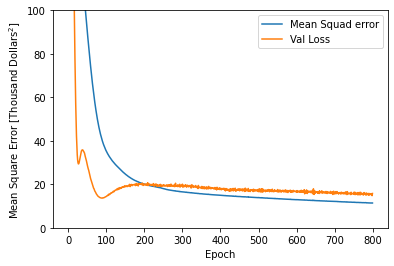

In [55]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
plt.plot(hist['epoch'], hist['mse'], label='Mean Squad error')
plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
plt.legend()
plt.ylim([0,100])

In [ ]:
model.summary()

In [56]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

In [57]:
batch_size = 32
epochs = 800
inp_shape = train_features.shape[1]

In [58]:
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std

In [59]:
model = Sequential([
    Dense(20, activation='relu', input_shape=(inp_shape,)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
history = model.fit(train_features, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

val_mae: 2.0537 - val_mse: 6.1933
Epoch 680/800
12/12 [==============================] - 0s 6ms/step - loss: 6.3712 - mae: 1.7622 - mse: 6.3712 - val_loss: 6.1446 - val_mae: 2.0459 - val_mse: 6.1446
Epoch 681/800
12/12 [==============================] - 0s 5ms/step - loss: 6.4020 - mae: 1.7719 - mse: 6.4020 - val_loss: 5.9282 - val_mae: 2.0127 - val_mse: 5.9282
Epoch 682/800
12/12 [==============================] - 0s 6ms/step - loss: 6.3518 - mae: 1.7640 - mse: 6.3518 - val_loss: 6.1365 - val_mae: 2.0404 - val_mse: 6.1365
Epoch 683/800
12/12 [==============================] - 0s 6ms/step - loss: 6.3620 - mae: 1.7589 - mse: 6.3620 - val_loss: 6.2969 - val_mae: 2.0656 - val_mse: 6.2969
Epoch 684/800
12/12 [==============================] - 0s 5ms/step - loss: 6.3835 - mae: 1.7627 - mse: 6.3835 - val_loss: 6.1273 - val_mae: 2.0363 - val_mse: 6.1273
Epoch 685/800
12/12 [==============================] - 0s 7ms/step - loss: 6.3699 - mae: 1.7619 - mse: 6.3699 - val_loss: 5.9718 - val_mae: 2

In [60]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

(0.0, 100.0)

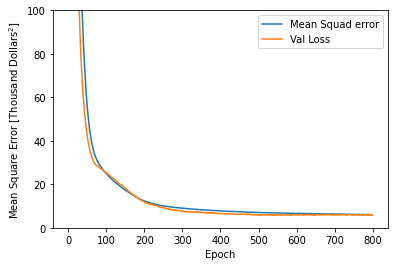

In [61]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
plt.plot(hist['epoch'], hist['mse'], label='Mean Squad error')
plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
plt.legend()
plt.ylim([0,100])